### Library imports for the code

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import warnings
import os, re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from datetime import datetime as dt
%matplotlib inline
warnings.filterwarnings('ignore')

### Classifier Tester

Will test and show important metrics for any classifier passed to it

In [2]:
def testClassifier(x_train, y_train, x_test, y_test, clf):
    metrics = []
    start = dt.now()
    clf.fit(x_train, y_train)
    end = dt.now()
    print ('training time: ', (end - start))
    metrics.append(end-start)
    start = dt.now()
    yhat = clf.predict(x_test)
    end = dt.now()
    print ('testing time: ', (end - start))
    metrics.append(end-start)
    print ('classification report: ')
    print(classification_report(y_test, yhat))
    print ('f1 score')
    print (f1_score(y_test, yhat, average='macro'))
    print ('accuracy score')
    print (accuracy_score(y_test, yhat))
    precision = precision_score(y_test, yhat, average=None)
    recall = recall_score(y_test, yhat, average=None)
    for p, r in zip(precision, recall):
        metrics.append(p)
        metrics.append(r)
    metrics.append(f1_score(y_test, yhat, average='macro'))
    print ('confusion matrix:')
    print (confusion_matrix(y_test, yhat))
    plt.imshow(confusion_matrix(y_test, yhat), interpolation='nearest')
    plt.show()
    return metrics
metrics_dict = []

## DBWorld Emails Data

The data for this database is already pre-processed and in bag of words format. We just read and split the data into train test sets

In [3]:
dbworld = 'Datasets/dbworld/MATLAB/dbworld_bodies_stemmed.mat'
db_world = sio.loadmat(dbworld)
db_world_inputs = db_world['inputs']
db_world_labels = db_world['labels'].reshape(len(db_world['labels']),)
X_train, X_test, y_train, y_test = train_test_split(db_world_inputs, 
                    db_world_labels, test_size=0.33, random_state=42)

#### Naive Bayes

We have chosen MultinomialNB as it gives the best results for Naive Bayes in case of text classification.

training time:  0:00:00.012191
testing time:  0:00:00
classification report: 
             precision    recall  f1-score   support

          0       0.92      0.92      0.92        13
          1       0.89      0.89      0.89         9

avg / total       0.91      0.91      0.91        22

f1 score
0.905982905982906
accuracy score
0.9090909090909091
confusion matrix:
[[12  1]
 [ 1  8]]


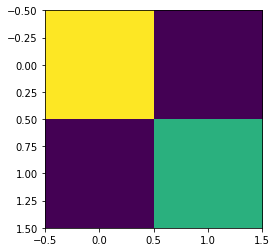

In [4]:
mnb = MultinomialNB()
mnb_me = testClassifier(X_train, y_train, X_test, y_test, mnb)
metrics_dict.append({'name':'NaiveBayes', 'metrics':mnb_me})

#### Rocchio Classification

For this we will be using the NearestCentroid classifier as when it is used for text classification with tf-idf vectors, this classifier is also known as the Rocchio classifier.

training time:  0:00:00.002045
testing time:  0:00:00.000997
classification report: 
             precision    recall  f1-score   support

          0       1.00      0.85      0.92        13
          1       0.82      1.00      0.90         9

avg / total       0.93      0.91      0.91        22

f1 score
0.9083333333333333
accuracy score
0.9090909090909091
confusion matrix:
[[11  2]
 [ 0  9]]


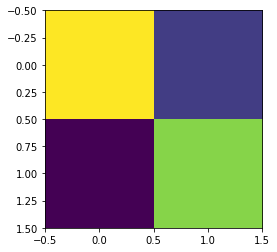

In [5]:
tfidf = TfidfTransformer()
tfidf.fit(X_train)
train_tf = tfidf.transform(X_train)
test_tf = tfidf.transform(X_test)
ncr = NearestCentroid()
ncr_me = testClassifier(train_tf, y_train, test_tf, y_test, ncr)
metrics_dict.append({'name':'Rocchio', 'metrics':ncr_me})

#### kNN Classification

We'll use kNearestNeighbor for classification now. We tried different values for k and 4 came out to be the best for this.

training time:  0:00:00
testing time:  0:00:00.003567
classification report: 
             precision    recall  f1-score   support

          0       1.00      0.92      0.96        13
          1       0.90      1.00      0.95         9

avg / total       0.96      0.95      0.95        22

f1 score
0.9536842105263159
accuracy score
0.9545454545454546
confusion matrix:
[[12  1]
 [ 0  9]]


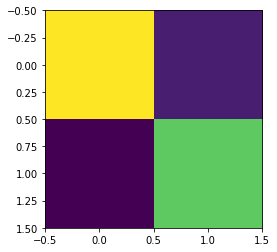

In [6]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn_me = testClassifier(train_tf, y_train, test_tf, y_test, knn)
metrics_dict.append({'name':'kNN', 'metrics':knn_me})

#### Conclusion

As we can see the kNN classifier with k=4 gives the highest accuracy and f1 score for this document. The training time is negligible but the testing time is the highest among all as it is a known trait of kNN.

## Health Tweets

First of all we need to do pre-processing on the data as it is in raw text format. We split the tweets according to the delimeter '|' and clean-up the text.

#### Pre-processing

We divide the documents into different classes according to the news agency accounts. The documents are then converted to tf-idf vectors. Further they are split into train test sets.

In [7]:
health_tweet = os.listdir('Datasets/Health-News-Tweets/Health-Tweets/')
X_data = []
y_data = []
for files in health_tweet:
    file = open('Datasets/Health-News-Tweets/Health-Tweets/'+files, encoding="utf8")
    data = file.readlines()
    for line in data:
        try:
            line = re.sub(r"http\S+", "", line.split('|')[2]).lower()
            X_data.append(line.strip())
            y_data.append(files.rstrip('.txt'))
        except: pass
    file.close()
vectorizer = CountVectorizer()
vectorizer.fit(X_data)
train_mat = vectorizer.transform(X_data)
tfidf = TfidfTransformer()
tfidf.fit(train_mat)
train_tfmat = tfidf.transform(train_mat)
X_train, X_test, y_train, y_test = train_test_split(train_tfmat, 
                    y_data, test_size=0.33, random_state=42)

#### Naive Bayes

We have chosen MultinomialNB as it gives the best results for Naive Bayes in case of text classification.

training time:  0:00:00.274875
testing time:  0:00:00.024196
classification report: 
                  precision    recall  f1-score   support

KaiserHealthNews       0.71      0.67      0.69      1202
       NBChealth       0.54      0.24      0.33      1419
       bbchealth       0.89      0.38      0.53      1323
       cbchealth       0.78      0.22      0.34      1274
       cnnhealth       0.75      0.23      0.36      1315
  everydayhealth       0.97      0.21      0.35      1083
   foxnewshealth       1.00      0.01      0.01       638
   gdnhealthcare       0.94      0.78      0.85       982
      goodhealth       0.33      0.95      0.49      2527
   latimeshealth       0.56      0.16      0.24      1425
   msnhealthnews       0.50      0.32      0.39      1041
       nprhealth       0.31      0.21      0.25      1534
   nytimeshealth       0.30      0.70      0.42      2005
  reuters_health       0.42      0.59      0.49      1597
    usnewshealth       1.00      0.01      0

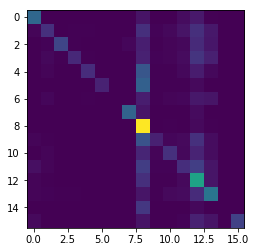

In [8]:
mnb = MultinomialNB()
mnb_me = testClassifier(X_train, y_train, X_test, y_test, mnb)
metrics_dict.append({'name':'NaiveBayes', 'metrics':mnb_me})

#### Rocchio Classification

For this we will be using the NearestCentroid classifier as when it is used for text classification with tf-idf vectors, this classifier is also known as the Rocchio classifier.

training time:  0:00:00.107705
testing time:  0:00:00.028529
classification report: 
                  precision    recall  f1-score   support

KaiserHealthNews       0.65      0.72      0.68      1202
       NBChealth       0.40      0.26      0.32      1419
       bbchealth       0.78      0.38      0.51      1323
       cbchealth       0.45      0.47      0.46      1274
       cnnhealth       0.47      0.48      0.47      1315
  everydayhealth       0.70      0.48      0.57      1083
   foxnewshealth       0.24      0.29      0.26       638
   gdnhealthcare       0.85      0.72      0.78       982
      goodhealth       0.75      0.68      0.71      2527
   latimeshealth       0.38      0.42      0.40      1425
   msnhealthnews       0.33      0.62      0.44      1041
       nprhealth       0.20      0.41      0.27      1534
   nytimeshealth       0.82      0.35      0.49      2005
  reuters_health       0.43      0.52      0.47      1597
    usnewshealth       0.54      0.56      0

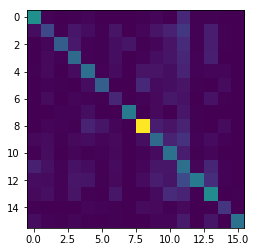

In [9]:
tfidf = TfidfTransformer()
tfidf.fit(X_train)
train_tf = tfidf.transform(X_train)
test_tf = tfidf.transform(X_test)
ncr = NearestCentroid()
ncr_me = testClassifier(train_tf, y_train, test_tf, y_test, ncr)
metrics_dict.append({'name':'Rocchio', 'metrics':ncr_me})

#### kNN Classification

We'll use kNearestNeighbor for classification now. We tried different values for k and 4 came out to be the best for this.

training time:  0:00:00.061494
testing time:  0:01:48.927677
classification report: 
                  precision    recall  f1-score   support

KaiserHealthNews       0.37      0.60      0.45      1202
       NBChealth       0.21      0.40      0.28      1419
       bbchealth       0.23      0.49      0.31      1323
       cbchealth       0.29      0.26      0.28      1274
       cnnhealth       0.35      0.34      0.34      1315
  everydayhealth       0.47      0.58      0.52      1083
   foxnewshealth       0.14      0.09      0.11       638
   gdnhealthcare       0.47      0.85      0.61       982
      goodhealth       0.70      0.59      0.64      2527
   latimeshealth       0.42      0.15      0.22      1425
   msnhealthnews       0.29      0.22      0.25      1041
       nprhealth       0.27      0.14      0.19      1534
   nytimeshealth       0.44      0.32      0.37      2005
  reuters_health       0.43      0.26      0.33      1597
    usnewshealth       0.67      0.38      0

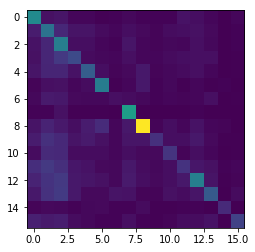

In [10]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn_me = testClassifier(train_tf, y_train, test_tf, y_test, knn)
metrics_dict.append({'name':'kNN', 'metrics':knn_me})

#### Conclusion

For this dataset the Rocchio outperformed the rest of the two classification algorithms and it also was the one that took the least amount of time for training as well testing of the data.

## Sentence Corpus

First of all we need to do pre-processing on the data as it is in raw text format. We split the dataset according to the Argumentative Zones annotation scheme and clean-up the text.

#### Pre-processing

We divide the documents into different classes according to the Argumentative Zones annotation scheme. The documents are then converted to tf-idf vectors. Further they are split into train test sets.

In [11]:
sentence_corpus = os.listdir('Datasets/SentenceCorpus/SentenceCorpus/labeled_articles')
X_data = []
y_data = []
for files in sentence_corpus:
    file = open ('Datasets/SentenceCorpus/SentenceCorpus/labeled_articles/'+files)
    data = file.readlines()
    for lines in data:
        if '###' not in lines:
            lines = lines.split("\t")
            try:
                X_data.append(lines[1].lower().replace(' citation',''))
                y_data.append(lines[0].lower().strip())
            except: pass
    file.close()
vectorizer = CountVectorizer()
vectorizer.fit(X_data)
train_mat = vectorizer.transform(X_data)
tfidf = TfidfTransformer()
tfidf.fit(train_mat)
train_tfmat = tfidf.transform(train_mat)
X_train, X_test, y_train, y_test = train_test_split(train_tfmat, 
                    y_data, test_size=0.33, random_state=42)

#### Naive Bayes

We have chosen MultinomialNB as it gives the best results for Naive Bayes in case of text classification.

training time:  0:00:00.008956
testing time:  0:00:00.001373
classification report: 
             precision    recall  f1-score   support

       aimx       0.00      0.00      0.00        35
       base       0.00      0.00      0.00         9
       cont       0.00      0.00      0.00        33
       misc       0.61      1.00      0.76       272
       ownx       0.83      0.29      0.43       150

avg / total       0.58      0.63      0.54       499

f1 score
0.23646979440642255
accuracy score
0.6312625250501002
confusion matrix:
[[  0   0   0  29   6]
 [  0   0   0   6   3]
 [  0   0   0  33   0]
 [  0   0   0 272   0]
 [  0   0   0 107  43]]


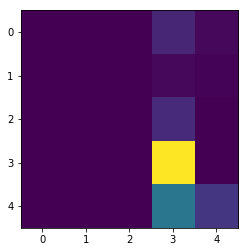

In [12]:
mnb = MultinomialNB()
mnb_me = testClassifier(X_train, y_train, X_test, y_test, mnb)
metrics_dict.append({'name':'NaiveBayes', 'metrics':mnb_me})

#### Rocchio Classification

For this we will be using the NearestCentroid classifier as when it is used for text classification with tf-idf vectors, this classifier is also known as the Rocchio classifier.

training time:  0:00:00.013593
testing time:  0:00:00.003481
classification report: 
             precision    recall  f1-score   support

       aimx       0.73      0.46      0.56        35
       base       0.50      0.22      0.31         9
       cont       0.44      0.33      0.38        33
       misc       0.79      0.93      0.85       272
       ownx       0.75      0.63      0.68       150

avg / total       0.74      0.75      0.74       499

f1 score
0.5562834866867061
accuracy score
0.7535070140280561
confusion matrix:
[[ 16   1   1   5  12]
 [  0   2   2   1   4]
 [  0   0  11  17   5]
 [  0   1   7 253  11]
 [  6   0   4  46  94]]


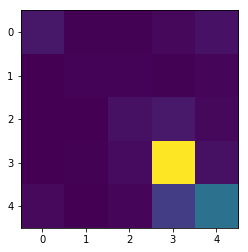

In [13]:
tfidf = TfidfTransformer()
tfidf.fit(X_train)
train_tf = tfidf.transform(X_train)
test_tf = tfidf.transform(X_test)
ncr = NearestCentroid()
ncr_me = testClassifier(train_tf, y_train, test_tf, y_test, ncr)
metrics_dict.append({'name':'Rocchio', 'metrics':ncr_me})

#### kNN Classification

We'll use kNearestNeighbor for classification now. We tried different values for k and 4 came out to be the best for this.

training time:  0:00:00.004380
testing time:  0:00:00.055142
classification report: 
             precision    recall  f1-score   support

       aimx       0.14      0.14      0.14        35
       base       0.00      0.00      0.00         9
       cont       0.16      0.09      0.12        33
       misc       0.75      0.79      0.77       272
       ownx       0.61      0.60      0.61       150

avg / total       0.61      0.63      0.62       499

f1 score
0.32674377265926563
accuracy score
0.6292585170340681
confusion matrix:
[[  5   0   0  17  13]
 [  1   0   2   0   6]
 [  3   1   3  18   8]
 [ 13   3  10 216  30]
 [ 14   5   4  37  90]]


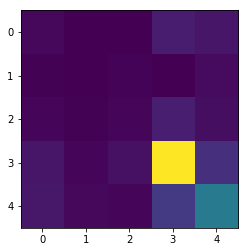

In [14]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn_me = testClassifier(train_tf, y_train, test_tf, y_test, knn)
metrics_dict.append({'name':'kNN', 'metrics':knn_me})

#### Conclusion

For this dataset again the Rocchio outperformed the rest of the two classification algorithms and it also was the one that took the least amount of time for training as well testing of the data. The Naive Bayes performed the worst in this case